# Homework 2: Simple linear regression using TensorFlow in Python
## Universidad de Monterrey### Joel Enrique Díaz Villanueva
#### IMT
#### Dr. Andrés Hernández Gutiérrez
##### Monterrey, N.L., 30 de agosto del 2024

###### Instalación de las librerías pandas, matplotlib y scikit-learn en JupyterNotebook.

In [15]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

#### numpy: Se utiliza para crear arreglos multidimensionales y realizar operaciones matemáticas, lógicas y de álgebra lineal, además de la generación de números aleatorios.
#### pandas: Proporciona estructuras de datos y herramientas para el análisis eficiente de datos tabulares, series temporales y matrices etiquetadas o no etiquetadas.
#### tensorflow: Librería desarrollada por Google, es de las más utilizadas para diseñar, entrenar, validar y probar el desarrollo de una red neuronal.
#### matplotlib: Está diseñada para crear gráficos y visualizaciones interactivas de datos, por ejemplo, para trazar las curvas de aprendizaje y evaluar el proceso de entrenamiento.
#### sklearn.model_selection: Esta biblioteca proporciona el método train_test_split para dividir el conjunto de datos inicial en los conjuntos de entrenamiento y validación.

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### La función (generate_data) genera una serie de números que siguen una línea recta, pero con un poco de ruido para asemejarlo más a la realidad.
#### La función cuenta con 3 entradas: los coeficientes de la función, la cantidad de variación o ruido que se añadirá y el número de muestras que se generarán.
#### La función np.random.seed(4500) es una semilla para generar siempre los mismos números aleatorios cada vez que se corra el código.
#### x genera un arreglo que va de 0 a 99 con pasos de 1, es decir, [0, 1, 2].
#### y es la función de la lista de valores que siguen una "tendencia lineal", con la inclusión de un ruido aleatorio en cada valor de y, utilizando la función np.random.normal.

In [17]:
def generate_data(true_coeffs = np.array([10,1 ]), noise_std = 2, num_samples = 100):
  # Seed for reproducibility
  np.random.seed(4500)

  # Generate synthetic data
  x =  np.arange(0,100,1)
  y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc = 0.0, scale = noise_std, size = num_samples)

  return x, y

#### Se utiliza la función generate_data para una regresión lineal simple con un ruido de entre 0 y 5 unidades que afectará a y. 
#### Se realizan 100 muestras, lo que significa que x va de 0 a 99. 
#### El código regresa los arreglos de x y de y, x siendo igual a uno que va de 0 a 99, mientras que y es y = 10 + x, con una variación de 5 unidades.

In [18]:
# Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

#### Utilizando la librería de matplotlib.pyplot se gráfica el dataset creado para realizar un EDA (Análisis exploratorio de datos). 
#### Se define el tamaño de la gráfica en pulgadas y el tamaño de la letra en el gráfico.
#### Asimismo, se muestra la función de la regresión lineal simple f(x) = 10 + x, donde se destaca que hay un sesgo de entre 0 a 5 
#### Finalmente, se muestra la leyenda, la cual en este caso son los datos generados y se muestra la gráfica.

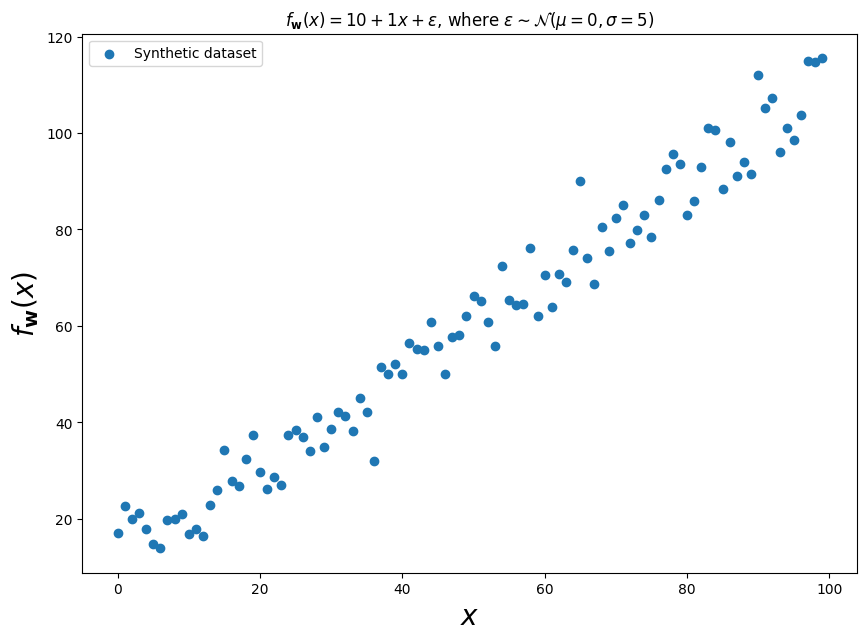

In [19]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x)= {true_coeffs[0]}+ {true_coeffs[1]} x+ \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
    fontsize=12)
plt.legend()
plt.show()

#### La función train_test_split de la biblioteca sklearn.model_selection, su función es dividir los datos de entrenamiento y de prueba, siendo el 20% de estos utilizados para prueba y el 80% para entrenamiento de la red neuronal, además la función random_state, se asegura de que siempre usemos los mismos datos, funcionando del mismo modo que la función np.random.seed(). Finalmente, la función shuffle, ayuda a que exista más esparcimiento entre los datos.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

#### Se grafican los datos x_train, y_train y a estos se les asignan el color rojo, siendo el restante 20% de color azul. Se grafican nuevamente para poder visualizar la división de los datos gráficamente. Además, se puede apreciar la utilidad de la función shuffle, la cual dispersa los datos, para que, la división sea más aleatoria y no sesgada.


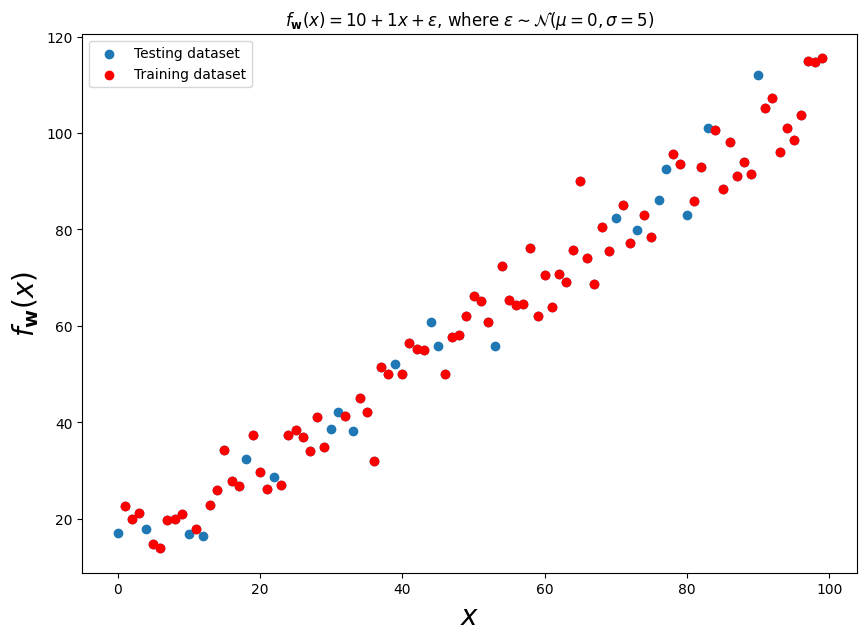

In [21]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x)= {true_coeffs[0]}+ {true_coeffs[1]} x+ \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
    fontsize=12)
plt.legend()
plt.show()


#### En este punto se define el modelo de regresión lineal utilizando TensorFlow y Keras. Es un modelo de regresión lineal debido a que no se utiliza ninguna función de activación que añada no linealidad.
#### Sequential significa que se añaden las capas o neuronas de manera secuencial, una tras otra. La parte de Input(shape=(1,)), significa que el modelo espera solamente recibir una sola entrada. 
#### En la función Dense se declara la única capa o neurona utilizada en el modelo.
#### El modelo se compila con el optimizador Adam, utilizado para ajustar los pesos del entrenamiento, mediante el descenso del gradiente. La función de pérdida será evaluda mediante la sumatoria de errores al cuadrado (Mean Squared Error = mse).

In [22]:
# Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

#### Con la función summary se observa lo anteriormente mencionado, donde el modelo tiene una sola capa y, por ende solamente entregará una sola salida, la cual será la predicción. Asimismo, se observa que se utilizan dos parámetros debido a que se tienen dos coeficientes en el modelo de regresión (f(x) = w0 * x0 + w1 * x1).



In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### En esta sección sucede el entrenamiento de la red neuronal, utilizando la función .fit, donde podemos ajustar diversos parámetros.
#### Entre ellos están las épocas, que básicamente son el número de iteraciones, el batch size, representa que los datos serán entrenados en lotes de 10 bloques, por época, el validation_split, significa que se usará un 10% de los datos de entrenamiento para validar el modelo, lo que nos ayudará a verificar si existe overfitting o underfitting, y verbose controla la cantidad de información que se imprime, en este caso 1 barra de progreso por cada época.
#### La función loss evalúa el modelo, devolviendo la pérdida utilizando los datos de prueba.

In [29]:
# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss}")

Epoch 1/500
8/8 [==============================] - 0s 11ms/step - loss: 73.5008 - val_loss: 66.4497
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 72.9456 - val_loss: 65.4158
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 72.3618 - val_loss: 64.4232
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 71.7797 - val_loss: 63.3761
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 71.2916 - val_loss: 62.3093
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 70.6528 - val_loss: 61.2633
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 70.0849 - val_loss: 60.2499
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 69.5196 - val_loss: 59.2242
Epoch 9/500
8/8 [==============================] - 0s 5ms/step - loss: 68.9803 - val_loss: 58.1398
Epoch 10/500
8/8 [==============================] - 0s 5ms/step - loss: 68.3941 - val_loss: 57.2210
Epoch 11

#### En esta sección se obtienen los pesos (w) y el sesgo (b) de la única neurona de la red neuronal (f(x) = w*x + b).

In [30]:
# Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights: {weights[0]}")
print(f"Bias: {weights[1]}")

Weights: [[1.0963174]]
Bias: [3.3769424]


#### Finalmente, en esta parte del código se realizan predicciones, utilizando en y_pred los datos de prueba y en y_pred_train los datos de entrenamiento.

In [31]:
# Make predictions
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 17ms/step


In [32]:
# Make predictions
y_pred_train = model.predict(x_train)

3/3 [==============================] - 0s 1ms/step


#### Nuevamente, se realiza un EDA, para observar la eficacia del modelo gráficamente. Siendo los puntos azules los datos utilizados como entrenamiento, y la línea roja la función de regresión obtenida por la red neuronal.

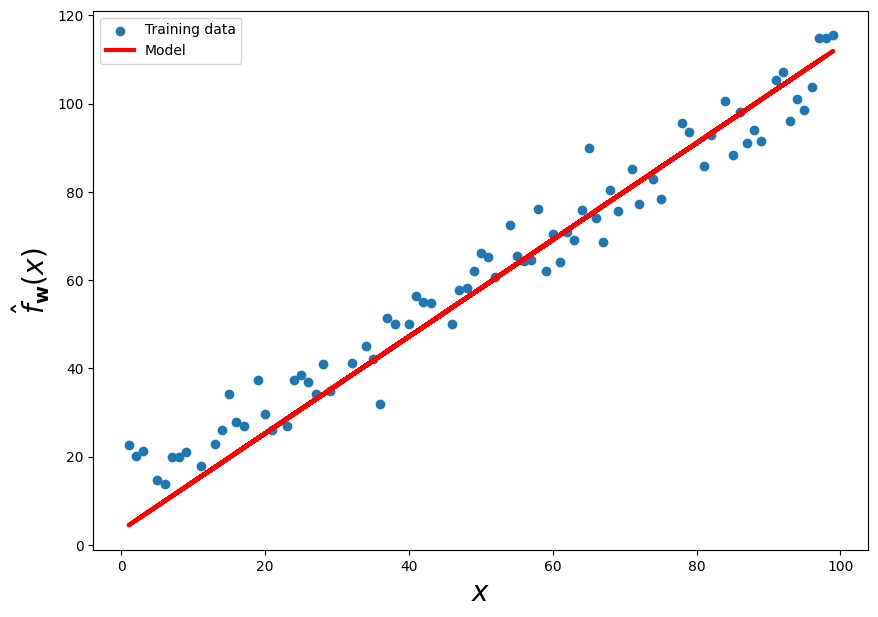

In [33]:
# Plot the results
plt.figure(figsize=(10,7))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt.legend();

### Conclusión

#### Como conclusión, durante este el desarrollo de este código, se pudieron observar los resultados de la red neuronal para predecir los valores de una regresión lineal con ruido utilizando solamente una neurona. Desde la generación de los datos, hasta el entrenamiento y predicción. Teniendo, desde mi punto de vista, resultados aceptables considerando el hecho de solamente haber utilizado una neurona, no haber utilizado funciones de activación y otras técnicas como el EarlyStopping.

#### La única duda con la que me quedo, es con el número de parámetros, en este caso fueron dos, debido a que la función de regresión tiene dos coeficientes, pero quisiera ver cómo esto funciona en otros problemas, ya sea de regresión o de otro concepto distinto. 

### Referencias
#### - Shah, N. (2018). Introduction to NumPy, Pandas and Matplotlib. Recuperado de: https://www.kaggle.com/code/chats351/introduction-to-numpy-pandas-and-matplotlib
#### - Stack Overflow. (n.d.). Random state (Pseudo-random number) in Scikit learn. Recuperado de: https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
#### - Cross Validated. (n.d.). What is the role of “shuffle” in train_test_split()? Recuperado de: https://stats.stackexchange.com/questions/550399/what-is-the-role-of-shuffle-in-train-test-split
#### - Team, K. (n.d.). Keras documentation: Adam. https://keras.io/api/optimizers/adam/
#### - TensorFlow. (n.d.). tf.keras.Sequential. Recuperado de: https://www.tensorflow.org/api_docs/python/tf/keras/Sequenti
#### - TensorFlow. (n.d.). tf.keras.Dense. Recuperado de: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Densealse